# Day 13 | ML | Random - Sample - imputation | Numeric Data

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


# Check missing (null) value

In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

# Create X & Y

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

# Apply Train Test Split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


# New column create in Both Train & Test

In [10]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [11]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [12]:
X_test.head()

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0


In [13]:
X_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN
168,NaN,25.9250,NaN


In [14]:
X_train.head()

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


# Replace Value Age_imputed

In [15]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

# Review Sample Random Generate Value

In [16]:
X_train['Age'].dropna().sample(1).values

array([65.])

In [17]:
X_train['Age'].isnull().sum()

148

In [21]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([35.  , 62.  , 28.  , 24.  , 22.  , 23.  ,  9.  , 25.  , 24.  ,
        3.  , 36.  , 24.  , 40.  , 17.  , 28.  , 40.  , 26.  , 30.  ,
       43.  , 16.  , 39.  , 35.  , 24.  ,  4.  , 40.  , 42.  , 50.  ,
       31.  , 31.  ,  4.  ,  2.  , 42.  , 26.  , 21.  , 56.  , 45.  ,
        0.75, 14.  , 15.  , 38.  , 22.  , 36.  ,  4.  , 21.  , 20.  ,
       18.  ,  1.  , 24.  , 54.  , 23.  , 60.  , 17.  , 35.  , 50.  ,
        2.  , 36.  , 25.  , 14.  , 43.  , 17.  , 25.  , 28.  , 30.  ,
       29.  , 51.  , 16.  ,  9.  , 22.  , 50.  , 63.  , 56.  , 40.  ,
       30.  , 33.  , 31.  , 31.  , 36.  , 35.  ,  4.  , 54.  , 39.  ,
       39.  , 47.  , 16.  , 28.  , 16.  , 44.  , 50.  , 15.  , 21.  ,
       20.  , 61.  , 25.  , 46.  , 36.  , 27.  , 42.  , 18.  , 23.  ,
        3.  , 25.  , 14.  , 19.  , 21.  , 27.  , 25.  , 25.  , 19.  ,
       38.  , 23.  , 39.  , 43.  , 39.  , 52.  , 32.  , 48.  , 54.  ,
       24.  , 15.  , 18.  , 32.  , 44.  , 27.  , 56.  , 28.  ,  9.  ,
       58.  , 45.  ,

In [24]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,18.0
493,71.0,49.5042,71.0
527,NaN,221.7792,32.0


# Compare Original Age and Imputed Age

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12888\2131456624.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12888\2131456624.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['A

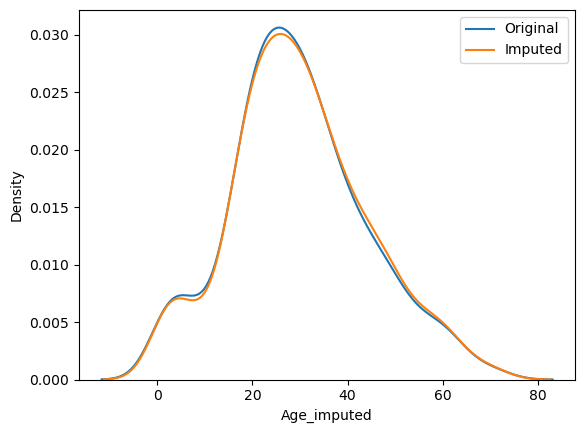

In [25]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)
plt.legend()
plt.show()

# Compare Variable Variance

In [26]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  206.42663730700545
